## Fitting a protein unfolding curve from CD to a two-state thermodynamical model

In [1]:
from CircularDichroism import CD_Unfolding

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Input file
Fn = "Protein_CD_Melting.csv"

X = np.array([ l.split(',') for l in open(Fn) ],dtype=np.float64).T

T = X[0]
Y = X[1]

In [3]:
CD = CD_Unfolding(T,Y,T_Units="C",Energy_Units="kcal")

El = CD.Gibbs_Helmholtz_Eq(CD.T,*CD.Pars)

In [4]:
def Setup_Plot(X,Y,Yfit,fs=12,col='k'):
    plt.plot(X,Yfit,color=col,lw=1)
    plt.scatter(X,Y,s=4,color=col)
    plt.xlabel("Temperature (C)",fontsize=fs)
    plt.ylabel("Molar ellipticity at 222 nm",fontsize=fs)
    return

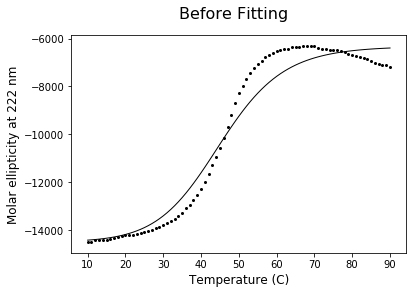

In [5]:
Setup_Plot(T,Y,El)
plt.suptitle("Before Fitting",fontsize=16)
plt.savefig("Before_Fitting.jpg")
plt.show()

In [6]:
CD.Fit()
El = CD.Gibbs_Helmholtz_Eq(CD.T,*CD.Pars)

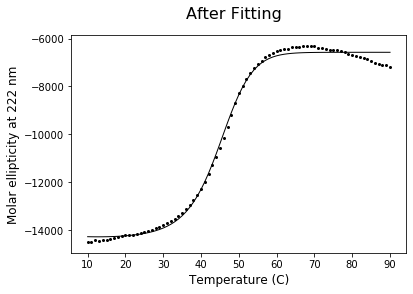

In [7]:
Setup_Plot(T,Y,El)
plt.suptitle("After Fitting",fontsize=16)
plt.savefig("After_Fitting.jpg")
plt.show()

In [8]:
CD.Info()

Melting temperature =   44.71 C
Enthalpy            =   -44.1569 kcal / mol
deltaG at   25.00 C =   -12.3313 kcal / mol
